DUOC UC<BR>
Minería de Datos
<BR>
Nombre de profesor: Gabriel Estivales<br>
Integrantes: Pamela Rosa Aldana Rojas  15405353-0<BR>
             Nicole Asenjo

#Metodología CRISP-DM



La metodología CRISP-DM (Cross Industry Standard Process for Data Mining) consta de seis fases: Comprensión del negocio, Comprensión de los datos, Preparación de los datos, Modelado, Evaluación e Implementación. A continuación, se aplica esta metodología para predecir la variable objetivo RainTomorrow (si llueve al día siguiente - No / Sí) utilizando el conjunto de datos meteorológicos de Australia

#1. Comprensión del Negocio


Contexto
El proyecto se trata del estudio de un set de datos con lecturas relacionadas al clima en distintas ciudades de Australia. En este caso buscamos predecir la variable objetivo RainTomorrow(si hay lluvia al día siguiente - No / Sí), esta variable objetivo es de dtype Object. Debido a esto ultimo, nuestro proyecto apuntara al uso de un problema de clasificacion para eventualmente realizar una prediccion si hay lluvia al día siguiente.

**Objetivo del Negocio**: Predecir si lloverá al día siguiente (RainTomorrow) para mejorar la planificación y toma de decisiones en áreas como la agricultura, gestión de recursos hídricos y preparación ante desastres naturales.
<br>
**Relevancia del Análisis:** Australia, siendo un continente con condiciones climáticas extremas y diversas, requiere predicciones precisas del clima para mitigar los impactos de fenómenos como sequías, inundaciones y ciclones.



#2. Comprensión de los Datos



Para empezar se importacion de librerias y configuraciones iniciales necesarias para el desarrollo del proyecto

In [141]:
from scipy.stats import pearsonr
import pickle as pickle
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
#import category_encoders as ce

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE

In [142]:
#from google.colab import files
#uploaded = files.upload()
#for fn in uploaded.keys():
#  name=fn
name = './weatherAUS.csv'

In [143]:
df = pd.read_csv(name, sep=",", low_memory=False)

In [5]:
df1=df

In [6]:
df2=df

In [ ]:
df3=df

Descripción del Conjunto de Datos:

Date: Fecha de la observación<br>
Location: Ubicación de la estación meteorológica<br>
MinTemp: Temperatura mínima en grados Celsius<br>
MaxTemp: Temperatura máxima en grados Celsius<br>
Lluvia: Cantidad de lluvia registrada ese día en mm.<br>
Evaporacion: Evaporación (mm) en 24 horas<br>
Sunshine: Número de horas de sol brillante en el día<br>
DirRafaga: Dirección de la ráfaga de viento más fuerte en 24 horas.<br>
VelRafaga: Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.<br>
Dir9am: Dirección del viento a las 9am<br>
Dir3pm: Dirección del viento a las 3pm<br>
Vel9am: Velocidad (km/hr) del viento a las 9am<br>
Vel3pm: Velocidad (km/hr) del viento a las 3pm<br>
Hum9am: Porcentaje de humedad a las 9am<br>
Hum3pm: Porcentaje de humedad a las 3pm<br>
Pres9am: Presión atmosférica (hpa) a nivel del mar a las 9am<br>
Pres3pm: Presión atmosférica (hpa) a nivel del mar a las 3pm<br>
Nub9am: Fracción del cielo cubierto por nubes a las 9am.<br>
Nub3pm: Fracción del cielo cubierto por nubes a las 3pm.<br>
Temp9am: Temperatura en grados Celsius a las 9am<br>
Temp3pm: Temperatura en grados Celsius a las 3pm<br>
RainToday: Variable indicadora de si llovió hoy (>1 mm)<br>
RISK_MM: Cantidad de lluvia registrada en mm<br>
RainTomorrow: Variable objetivo, indicadora de si lloverá mañana (Sí/No)<br>

###Analisis exploratorio de los datos

Empezamos analizando el set de datos que vamos a trabajar para comprender lo que tenemos.

In [7]:
df.shape

(142193, 24)

##**Descripción del dataset:**

**Registros**: 142.193
**Variables:** 24

##**Variables:**

**Características numéricas:** 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am''Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'RISK_MM .

**Características categóricas:**'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday'

**Variable objetivo**: RainTomorrow (Sí/No).


Partimos extrayendo una muestra aleatoria de todo el set de datos con tamaño de 10 filas

In [8]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,0.0,No


In [ ]:
df.shape

(142193, 24)

Con este codigo revisamos el tamaño del set y los tipos de datos que hay en cada columna. El dataset consta de 142.193 filas repartidas en 24 columnas

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

Podemos ver que el dataset tiene 17 variables dtype float, tiene 7 variables dtype Object .

In [ ]:
df["RainTomorrow"].head(10)

0     No
1     No
2     No
3     No
4     No
5     No
6     No
7     No
8    Yes
9     No
Name: RainTomorrow, dtype: object

La variable objetivo es RainTomorrow que es de dtype object y nos entrega clases no y yes.

## Estadistica Descriptiva

In [ ]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


**Análisis Descriptivo de los Cuartiles de Temperatura y Precipitación**
Al realizar un análisis preliminar de los datos de temperatura mínima y máxima, así como de las precipitaciones, se pueden observar las siguientes características destacadas en los cuartiles:

**Temperatura Mínima (MinTemp)**
* Primer Cuartil (Q1): La temperatura mínima del primer cuartil varía entre -8.5 y 7.6 grados Celsius, cubriendo un rango de aproximadamente 16 grados. Esto indica una alta variabilidad en las temperaturas más bajas.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura oscila entre 7.6 y 12 grados Celsius, presentando un rango más estrecho de unos 4.4 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura varía de 12 a 16.8 grados Celsius, con un rango de aproximadamente 4.8 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 16.8 y 33.9 grados Celsius, mostrando un rango de aproximadamente 17 grados. Este rango más amplio sugiere que las temperaturas más altas tienen una mayor dispersión.

**Temperatura Máxima (MaxTemp)**
* Primer Cuartil (Q1): La temperatura máxima del primer cuartil se sitúa entre -4.8 y 17.9 grados Celsius, cubriendo un rango de aproximadamente 22.7 grados.
* Segundo Cuartil (Q2): Entre el primer cuartil y la mediana, la temperatura varía entre 17.9 y 22.6 grados Celsius, abarcando un rango de 4.7 grados.
* Tercer Cuartil (Q3): Entre la mediana y el tercer cuartil, la temperatura fluctúa de 22.6 a 28.2 grados Celsius, presentando un rango de 5.6 grados.
* Cuarto Cuartil (Q4): La temperatura en el cuarto cuartil oscila entre 28.2 y 48.1 grados Celsius, con un rango de aproximadamente 19.9 grados, mostrando una mayor dispersión en las temperaturas más altas.

**Precipitaciones (Rainfall)**
* Primer a Tercer Cuartil (Q1-Q3): La mayoría de los datos de precipitaciones se concentran en valores bajos, ya que los valores de los primeros tres cuartiles (Q1, Q2 y Q3) son todos 0 mm. Esto indica que hubo pocos días con precipitaciones registradas.
* Cuarto Cuartil (Q4): En el cuarto cuartil, las precipitaciones varían entre 0.8 mm y 371 mm, con un rango considerable de aproximadamente 370.2 mm. Esto sugiere que las lluvias fueron escasas pero intensas en ciertos días.


Estos análisis muestran la variabilidad en las temperaturas mínimas y máximas, con una dispersión mayor en los extremos de los cuartiles. Las precipitaciones, por otro lado, muestran que la mayoría de los días tuvieron poca o ninguna lluvia, concentrándose las precipitaciones en eventos menos frecuentes pero más intensos.

Esta interpretación permite una comprensión detallada de las características climáticas en los datos, proporcionando una base sólida para futuros análisis y modelos predictivos.

## Variables Numericas

In [144]:
# Seleccionar solo las columnas numéricas
df_numerico = df.select_dtypes(include=['float64', 'int64'])

# Ver las primeras filas del DataFrame filtrado
print(df_numerico.head())


   MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          NaN       NaN           44.0   
1      7.4     25.1       0.0          NaN       NaN           44.0   
2     12.9     25.7       0.0          NaN       NaN           46.0   
3      9.2     28.0       0.0          NaN       NaN           24.0   
4     17.5     32.3       1.0          NaN       NaN           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RISK_MM  
0       1007.1       8.0       NaN     16.9     21.8      0.0  
1       1007

In [145]:
df_numerico.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RISK_MM'],
      dtype='object')

###Correlacion

In [147]:
corr = df.corr(numeric_only=True)
corr


,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
MinTemp,1.000000,0.736267,0.104255,0.467261,0.072961,0.177285,0.176005,0.175749,-0.234211,0.005999,-0.451260,-0.461623,0.077625,0.020489,0.901813,0.708865,0.124743
MaxTemp,0.736267,1.000000,-0.074839,0.588915,0.469967,0.067690,0.014680,0.050800,-0.505432,-0.509270,-0.332293,-0.427279,-0.289865,-0.279053,0.887020,0.984562,-0.044208
Rainfall,0.104255,-0.074839,1.000000,-0.064549,-0.227525,0.133497,0.086816,0.057759,0.223725,0.255312,-0.168085,-0.126728,0.198195,0.171993,0.011477,-0.079178,0.308557
Evaporation,0.467261,0.588915,-0.064549,1.000000,0.366607,0.203001,0.193936,0.128895,-0.505890,-0.392785,-0.269907,-0.293160,-0.185032,-0.184287,0.545497,0.574275,-0.043498
Sunshine,0.072961,0.469967,-0.227525,0.366607,1.000000,-0.032831,0.008040,0.056012,-0.491603,-0.629122,0.040959,-0.020464,-0.675610,-0.704202,0.291139,0.490180,-0.294973
WindGustSpeed,0.177285,0.067690,0.133497,0.203001,-0.032831,1.000000,0.604837,0.686419,-0.215461,-0.026663,-0.457891,-0.412922,0.071235,0.109088,0.150258,0.032970,0.162923
WindSpeed9am,0.176005,0.014680,0.086816,0.193936,0.008040,0.604837,1.000000,0.519971,-0.270807,-0.031607,-0.227923,-0.174916,0.024280,0.053584,0.129298,0.005108,0.069404
WindSpeed3pm,0.175749,0.050800,0.057759,0.128895,0.056012,0.686419,0.519971,1.000000,-0.145942,0.015903,-0.295567,-0.254988,0.052780,0.025269,0.163601,0.028567,0.049240
Humidity9am,-0.234211,-0.505432,0.223725,-0.505890,-0.491603,-0.215461,-0.270807,-0.145942,1.000000,0.667388,0.139519,0.186955,0.452182,0.358043,-0.472826,-0.499777,0.172417
Humidity3pm,0.005999,-0.509270,0.255312,-0.392785,-0.629122,-0.026663,-0.031607,0.015903,0.667388,1.000000,-0.027449,0.051840,0.517037,0.523270,-0.221467,-0.557989,0.313183


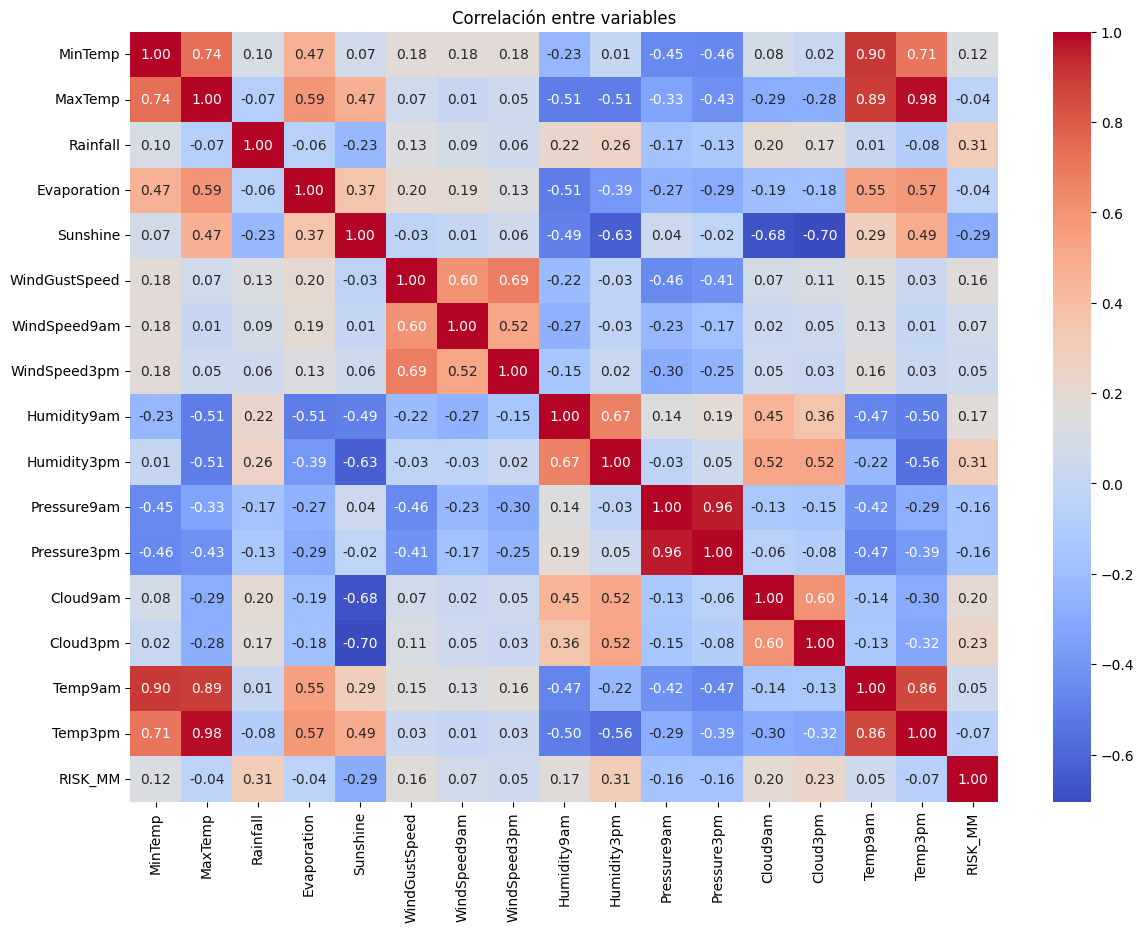

In [ ]:
# Visualizar la correlación entre las variables
plt.figure(figsize=(14, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 10})
plt.title('Correlación entre variables')
plt.show()



Se analiza la correlación que existe en las variables entre si,  teniendo en cuenta que aunque exista correlación no necesariamente implica que exista causalidad.<br>
Se observa que existen correlaciones tanto positivas como negativas.

**Correlaciones Fuertes y Positivas:**
* MinTemp y MaxTemp (0.736): La temperatura mínima y máxima diarias están fuertemente correlacionadas, lo que indica que los días más cálidos tienden a tener tanto temperaturas mínimas como máximas más altas.
* MaxTemp y Temp3pm (0.985): La temperatura máxima del día está muy fuertemente correlacionada con la temperatura a las 3 PM. Se entiende quelas temperaturas más altas del día suelen registrarse por la tarde.
* Temp9am y Temp3pm (0.861): Las temperaturas registradas a las 9 AM y a las 3 PM están fuertemente correlacionadas, indican que si la mañana es cálida, la tarde también lo será.

**Correlaciones Fuertes y Negativas:**
* MaxTemp y Humidity3pm (-0.509): La temperatura máxima está inversamente correlacionada con la humedad a las 3 PM. Los días más cálidos suelen tener menor humedad por la tarde.
* Sunshine y Humidity3pm (-0.629): La cantidad de horas de sol está inversamente correlacionada con la humedad a las 3 PM, indicando que días más soleados tienden a ser menos húmedos.
* Sunshine y Cloud3pm (-0.704): La cantidad de sol está fuertemente inversamente correlacionada con la nubosidad a las 3 PM. Esto es lógico ya que más sol significa menos nubes.

## Histograma
Revisamos la distribucion de las variables

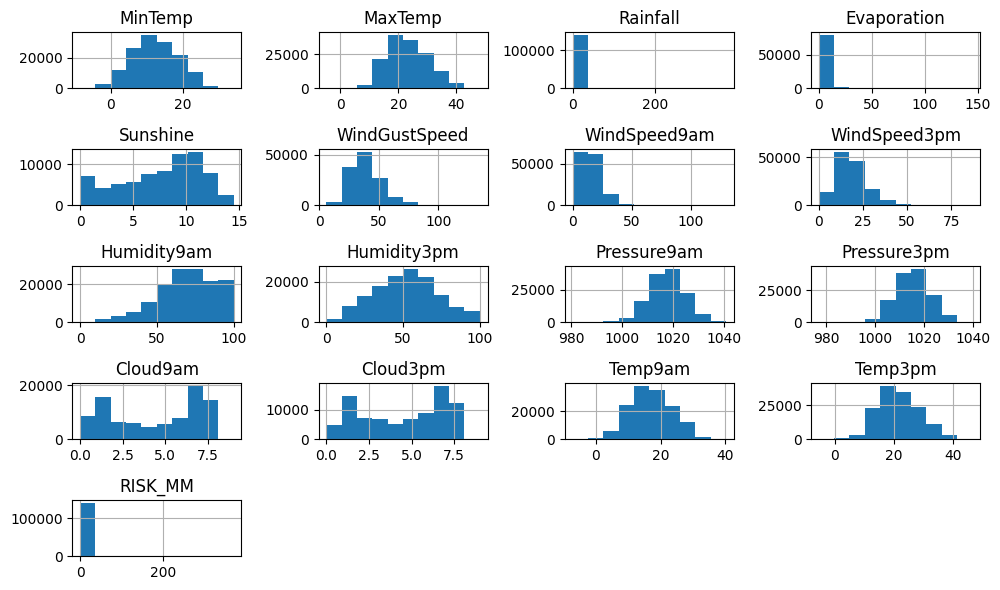

In [ ]:
# Graficar histogramas de variables numéricas
df.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

Las variables minTemp, MaxTemp, Humidity3pm,Temp9am, pressure9am se visualizan con una distribucion

normal.

### Datos faltantes

In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RISK_MM              0
RainTomorrow         0
dtype: int64

Se muestran la cantidad de valores nulos que hay en el set de datos, y concluimos que las tres variables con mayor cantidad de nulos son:Sunshine(67816), Evaporation(60843) y Cloud3pm(57094)

In [ ]:
df.isna().sum().sum()

316559

El total datos nulos es de 316.559 datos.

## Variables Categoricas

In [47]:
# Seleccionar solo las columnas de tipo object
df_obj = df.select_dtypes(include=['object'])
print(df_obj)

              Date Location WindGustDir WindDir9am WindDir3pm RainToday  \
0       2008-12-01   Albury           W          W        WNW        No   
1       2008-12-02   Albury         WNW        NNW        WSW        No   
2       2008-12-03   Albury         WSW          W        WSW        No   
3       2008-12-04   Albury          NE         SE          E        No   
4       2008-12-05   Albury           W        ENE         NW        No   
...            ...      ...         ...        ...        ...       ...   
142188  2017-06-20    Uluru           E        ESE          E        No   
142189  2017-06-21    Uluru           E         SE        ENE        No   
142190  2017-06-22    Uluru         NNW         SE          N        No   
142191  2017-06-23    Uluru           N         SE        WNW        No   
142192  2017-06-24    Uluru          SE        SSE          N        No   

       RainTomorrow  
0                No  
1                No  
2                No  
3          

In [ ]:
df_obj.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

### Ciudades de Australia, que registran su clima

In [ ]:
print(f'Las ciudades en el dataset son: {df["Location"].unique()}')
print(f'Siendo un total de {len(df["Location"].unique())} ciudades')

Las ciudades en el dataset son: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Siendo un total de 49 ciudades


In [ ]:
# separo las variables por tipo y reviso los datos para ver si se repiten o se ve algo anormal
for col in df_obj:
  print(f'Columna {col}: {df[col].unique()}{df[col].nunique()} subniveles')

Columna Date: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']3436 subniveles
Columna Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']49 subniveles
Columna WindGustDir: ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']16 subniveles
Columna WindDir9am: ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']16 subniveles
Columna WindDir3pm: ['WNW

# 3. Preparación de los Datos

**Limpieza de Datos**

Se preparan los datos de manera adecuada para evitar problemas de sobreajuste o subajuste en los modelos y  se realizan  las siguientes transformaciones:




In [ ]:
# Comprobar qué columnas están presentes en el DataFrame
print("Columnas disponibles en el DataFrame:", df.columns)


Columnas disponibles en el DataFrame: Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')


##Manejo de Valores Nulos

Se imputan los valores nulos por la media

###**Imputación basada en agrupación**

**Variable MinTemp**

 **MinTemp**: Evaluamos los valores nulos, tiene 637 datos

In [9]:
df["MinTemp"].isna().sum()

637

In [10]:
df["MinTemp"].mean()

12.186399728729265

Se calcula el promedio de la temperatura mínima (MinTemp) para cada ubicación (Location) del conjunto de datos.

In [11]:
promedio_minTemp= df.groupby("Location")["MinTemp"].mean()
promedio_minTemp

Location
Adelaide            12.628368
Albany              12.948461
Albury               9.520899
AliceSprings        13.125182
BadgerysCreek       11.136900
Ballarat             7.355302
Bendigo              8.591065
Brisbane            16.410998
Cairns              21.199197
Canberra             6.827688
Cobar               13.120342
CoffsHarbour        14.365774
Dartmoor             8.619816
Darwin              23.210530
GoldCoast           17.341490
Hobart               9.079141
Katherine           20.534983
Launceston           7.833818
Melbourne           11.788127
MelbourneAirport     9.973945
Mildura             10.733954
Moree               12.786255
MountGambier         8.827468
MountGinini          3.651193
Newcastle           13.740240
Nhil                 8.992798
NorahHead           15.375197
NorfolkIsland       16.839960
Nuriootpa            9.366433
PearceRAAF          12.386314
Penrith             12.533649
Perth               12.922706
PerthAirport        12.580359
P


Ahora se reemplazan los valores faltantes en la columna "MinTemp" del DataFrame utilizando el promedio de la temperatura mínima para cada ubicación. Con este codigo remmplazamos los valores nulos de esa columna y mantenemos los promedios originales

In [12]:
df["MinTemp"] = df["MinTemp"].fillna(df.groupby("Location")["MinTemp"].transform("mean"))

Y de esa manera nos deshacemos de los valores nulos de esa columna mientras mantenemos los promedios originales

In [13]:
df["MinTemp"].isna().sum()

0

Se revisa nuevamente la variable MinTemp, y se observa que no tiene valores nulos.

**Cantidad de valores nulos en varias columnas específicas del df**

In [14]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 322
Cantidad de valores nulos en columna Humidity9am: 1774
Cantidad de valores nulos en columna Humidity3pm: 3610
Cantidad de valores nulos en columna Temp9am: 904
Cantidad de valores nulos en columna Temp3pm: 2726
Cantidad de valores nulos en columna WindSpeed9am: 1348
Cantidad de valores nulos en columna WindSpeed3pm: 2630
Cantidad de valores nulos en columna Pressure9am: 14014
Cantidad de valores nulos en columna Pressure3pm: 13981


**Imputación de los valores nulos**
Se utiliza el promedio de los valores no nulos agrupados por la columna "Location".

In [15]:
df["MaxTemp"] = df["MaxTemp"].fillna(df.groupby("Location")["MaxTemp"].transform("mean"))

df["Humidity9am"] = df["Humidity9am"].fillna(df.groupby("Location")["Humidity9am"].transform("mean"))
df["Humidity3pm"] = df["Humidity3pm"].fillna(df.groupby("Location")["Humidity3pm"].transform("mean"))

df["Temp9am"] = df["Temp9am"].fillna(df.groupby("Location")["Temp9am"].transform("mean"))
df["Temp3pm"] = df["Temp3pm"].fillna(df.groupby("Location")["Temp3pm"].transform("mean"))

df["WindSpeed9am"] = df["WindSpeed9am"].fillna(df.groupby("Location")["WindSpeed9am"].transform("mean"))
df["WindSpeed3pm"] = df["WindSpeed3pm"].fillna(df.groupby("Location")["WindSpeed3pm"].transform("mean"))

df["Pressure9am"] = df["Pressure9am"].fillna(df.groupby("Location")["Pressure9am"].transform("mean"))
df["Pressure3pm"] = df["Pressure3pm"].fillna(df.groupby("Location")["Pressure3pm"].transform("mean"))


En resumen, este código realiza una imputación de los valores nulos en las columnas mencionadas utilizando el promedio de los valores no nulos agrupados por la ubicación. Esto ayuda a preservar la coherencia geográfica en los datos al imputar valores faltantes

In [16]:
print(f'Cantidad de valores nulos en columna MaxTemp: {df["MaxTemp"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Humidity9am: {df["Humidity9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Humidity3pm: {df["Humidity3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Temp9am: {df["Temp9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Temp3pm: {df["Temp3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna WindSpeed9am: {df["WindSpeed9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna WindSpeed3pm: {df["WindSpeed3pm"].isna().sum()}')

print(f'Cantidad de valores nulos en columna Pressure9am: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm: {df["Pressure3pm"].isna().sum()}')

Cantidad de valores nulos en columna MaxTemp: 0
Cantidad de valores nulos en columna Humidity9am: 0
Cantidad de valores nulos en columna Humidity3pm: 0
Cantidad de valores nulos en columna Temp9am: 0
Cantidad de valores nulos en columna Temp3pm: 0
Cantidad de valores nulos en columna WindSpeed9am: 0
Cantidad de valores nulos en columna WindSpeed3pm: 0
Cantidad de valores nulos en columna Pressure9am: 11781
Cantidad de valores nulos en columna Pressure3pm: 11781


###**Imputar por la mediana**

**Variable Pressure3pm, Pressure9am**

In [17]:
subnulos = df[['Location', 'Pressure9am', 'Pressure3pm']]

# Contar la cantidad de valores nulos por ubicación
nulos_local = subnulos.groupby('Location').apply(lambda x: x.isnull().sum())

# Mostrar solo las ubicaciones con valores nulos y la cantidad de nulos en las columnas especificadas
print(nulos_local[nulos_local.sum(axis=1) > 0])


             Location  Pressure9am  Pressure3pm
Location                                       
MountGinini         0         2907         2907
Newcastle           0         2955         2955
Penrith             0         2964         2964
SalmonGums          0         2955         2955


El hecho de que todavía existan valores nulos en las columnas "Pressure9am" y "Pressure3pm" después de la imputación utilizando el promedio agrupado por ubicación , ocurre porque algunas ubicaciones tienen muchos valores nulos en esas columnas, lo que afecta la capacidad de la imputación basada en la media agrupada por ubicación.<br>
Dado que la variación en la presión atmosférica no es muy significativa y que hay relativamente pocos valores nulos en comparación con el tamaño total del conjunto de datos, se utiliza la mediana del conjunto de datos completo para imputar estos valores nulos, ya que la mediana es menos sensible a valores atípicos que la media.

In [18]:
# Calcular la mediana de las columnas 'Pressure9am' y 'Pressure3pm'
median_pressure9am = df['Pressure9am'].median()
median_pressure3pm = df['Pressure3pm'].median()

# Llenar los valores faltantes con la mediana calculada
df['Pressure9am'].fillna(median_pressure9am, inplace=True)
df['Pressure3pm'].fillna(median_pressure3pm, inplace=True)


In [19]:
print(f'Cantidad de valores nulos en columna Pressure9am después de la imputación: {df["Pressure9am"].isna().sum()}')
print(f'Cantidad de valores nulos en columna Pressure3pm después de la imputación: {df["Pressure3pm"].isna().sum()}')


Cantidad de valores nulos en columna Pressure9am después de la imputación: 0
Cantidad de valores nulos en columna Pressure3pm después de la imputación: 0


**Escalamiento**
Para hacer el escalamiento , se divide el valor de presión en hPa por el factor de conversión 68,947, lo que proporciona el valor equivalente en psi.

In [20]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

60613    1028.3
Name: Pressure3pm, dtype: float64
79361    1024.3
Name: Pressure9am, dtype: float64


In [21]:
df['Pressure3pm'] = df['Pressure3pm'] / 68.947
df['Pressure9am'] = df['Pressure9am'] / 68.947


In [22]:
print( df['Pressure3pm'].sample(1) )
print( df['Pressure9am'].sample(1) )

48388    14.530001
Name: Pressure3pm, dtype: float64
103243    14.778018
Name: Pressure9am, dtype: float64


**Imputacion por Moda :Variable WindGustSpeed**

Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas.

In [23]:
df['WindGustSpeed'].mode()

0    35.0
Name: WindGustSpeed, dtype: float64

In [24]:
print( df['WindGustSpeed'].sample(5) )

24188     52.0
123011    54.0
44587     41.0
46319     28.0
12845     52.0
Name: WindGustSpeed, dtype: float64


In [25]:
df[["WindGustSpeed"]].isna().sum()

WindGustSpeed    9270
dtype: int64

In [26]:
df['WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])

In [27]:
df[["WindGustSpeed"]].isna().sum()

WindGustSpeed    0
dtype: int64

###**Imputar por la mediana**

**Variables Cloud3pm y Cloud9am**

Cloud3pm y Cloud9am: indica qué tan nublado estaba el cielo segun hora del dia.

In [28]:
df[["Cloud9am","Cloud3pm"]].isna().sum()

Cloud9am    53657
Cloud3pm    57094
dtype: int64

In [29]:
df['Cloud9am'] = df['Cloud9am'].fillna(df['Cloud9am'].median())
df['Cloud3pm'] = df['Cloud3pm'].fillna(df['Cloud3pm'].median())

Usaremos la mediana para imputar los datos faltantes.

###**Eliminan nulos : Variable RainToday**

In [30]:
print(df['RainToday'].isnull().sum())


1406


In [31]:
null_rain_today_by_location = df.groupby('Location')['RainToday'].apply(lambda x: x.isnull().sum())
print(null_rain_today_by_location)


Location
Adelaide             70
Albany               20
Albury               20
AliceSprings          6
BadgerysCreek        51
Ballarat             11
Bendigo               4
Brisbane             29
Cairns               24
Canberra             16
Cobar                 8
CoffsHarbour         13
Dartmoor              4
Darwin                0
GoldCoast            56
Hobart                5
Katherine            14
Launceston            8
Melbourne           137
MelbourneAirport      0
Mildura               2
Moree                63
MountGambier          8
MountGinini          91
Newcastle            26
Nhil                  4
NorahHead            41
NorfolkIsland        20
Nuriootpa             6
PearceRAAF          116
Penrith              53
Perth                 0
PerthAirport          0
Portland             12
Richmond             45
Sale                  8
SalmonGums           14
Sydney                6
SydneyAirport         4
Townsville            6
Tuggeranong          39
Uluru  

Resumen de la cantidad de valores nulos en 'RainToday' para cada ubicación en tu conjunto de datos.<br>
 Al observar cuántos registros hay por ubicación, se puede determinar si hay ciudades con muy pocos registros. Si el número de registros para una ubicación es bajo y se eliminan los registros nulos en la columna RainToday,puede ocurrir que se eliminen todas las entradas para esa ubicación. Es para prevenir que se pierdan registros que revisamos antes de eliminar los valores nulos.

In [32]:
df = df.dropna(subset=['RainToday'])

La cantidad de registros por ciudad en el dataset variaron muy poco respecto al total general.

In [33]:
df.isnull().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir       9163
WindGustSpeed        0
WindDir9am        9660
WindDir3pm        3670
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

###**Valores Nulos datos Categoricos**

Ahora procedemos a tratar los valores nulos de las columnas de direccion del viento, variables que son de tipo categorica y por ello no podemos usar el promedio como lo hicimos antes, esta vez utilizaremos la moda ya que es el valor que mas se repite

'Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object'

In [34]:
# Rellenar valores nulos con la moda utilizando .loc para evitar SettingWithCopyWarning
df.loc[:, 'WindGustSpeed'] = df['WindGustSpeed'].fillna(df['WindGustSpeed'].mode()[0])
df.loc[:, 'WindGustDir'] = df['WindGustDir'].fillna(df['WindGustDir'].mode()[0])
df.loc[:, 'WindDir9am'] = df['WindDir9am'].fillna(df['WindDir9am'].mode()[0])
df.loc[:, 'WindDir3pm'] = df['WindDir3pm'].fillna(df['WindDir3pm'].mode()[0])


In [ ]:
df.isna().sum()

Date                 0
Location             0
MinTemp              0
MaxTemp              0
Rainfall             0
Evaporation      59694
Sunshine         66805
WindGustDir          0
WindGustSpeed        0
WindDir9am           0
WindDir3pm           0
WindSpeed9am         0
WindSpeed3pm         0
Humidity9am          0
Humidity3pm          0
Pressure9am          0
Pressure3pm          0
Cloud9am             0
Cloud3pm             0
Temp9am              0
Temp3pm              0
RainToday            0
RISK_MM              0
RainTomorrow         0
dtype: int64

###**Eliminar Variables**

Las variables Evaporation y Sunshine no son representativas para este estudio, que esta relacionado  la variable objetivo RainTomorrow que significa si llueve o no llueve.

In [35]:
print( df['RISK_MM'].sample(20) )

121912    0.0
31604     0.0
108446    0.0
25322     0.0
92286     1.8
54448     0.0
92306     0.0
19562     0.0
122810    0.0
129955    4.0
105155    0.0
99994     0.0
100092    5.6
9111      0.0
42927     0.0
100570    1.2
50243     0.0
51714     0.2
112376    0.0
20167     0.0
Name: RISK_MM, dtype: float64


In [36]:
df = df.drop(["Evaporation", "Sunshine"], axis =1)

##Revisamos el nuevo dataset

In [37]:
df.shape

(140787, 22)

In [38]:
df.isnull().sum().sum()

0

Ahora no existen valore nulos .

##**Outliers**:





###Grafico de Cajas

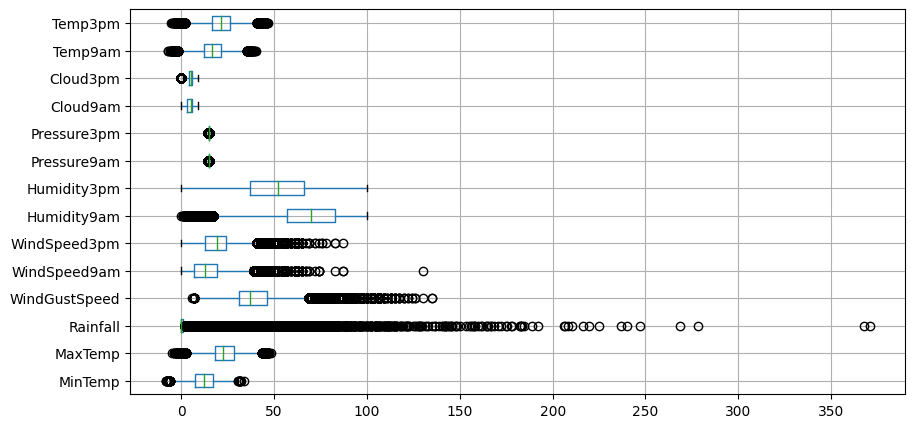

In [39]:
plt.figure(figsize=(10,5))
df.boxplot(column=['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm'], vert=False)
plt.show()

**Rango intercuartil** :  Se Identifican los outliers.  Este enfoque es especialmente útil cuando los datos no siguen una distribución normal.

Se utiliza método clip() , que no  elimina los valores atípicos (outliers), sino que los ajusta para que estén dentro del rango especificado. Donde los valores que estén por encima del límite superior serán establecidos en el valor del límite superior, y los valores que estén por debajo del límite inferior serán establecidos en el valor del límite inferior. Esto significa que los valores atípicos se ajustaran para que estén dentro del rango permitido, en lugar de eliminarlos por completo.








In [40]:
col_outliers = ['MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
           'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
           'Temp9am', 'Temp3pm', 'RISK_MM']

# Calcular el rango intercuartílico (IQR)

Q1 = df[col_outliers].quantile(0.25)
Q3 = df[col_outliers].quantile(0.75)
IQR = Q3 - Q1

# Definir los límites
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Aplicar el método clip utilizando los valores de lower y upper a todas las columnas en la lista 'columna'
df[col_outliers] = df[col_outliers].clip(lower=lower, upper=upper, axis=1)


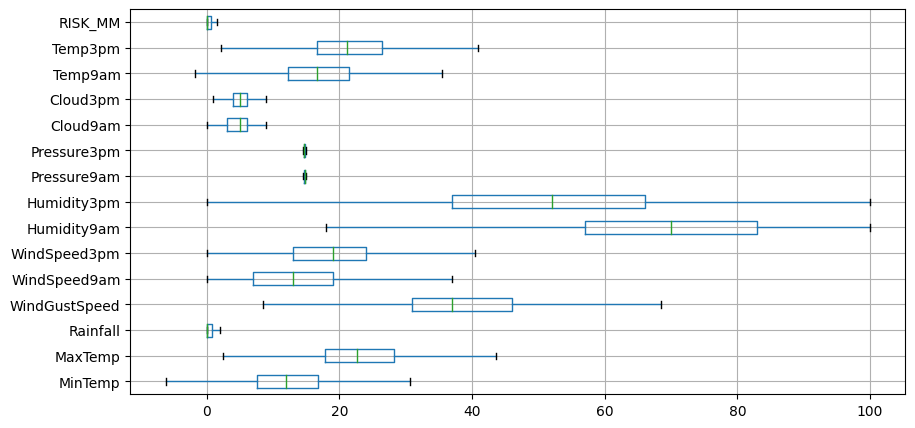

In [41]:
plt.figure(figsize=(10,5))
df.boxplot(column=['MinTemp', 'MaxTemp', 'Rainfall','WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm',
             'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm','RISK_MM'], vert=False)
plt.show()

In [42]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,...,22.0,14.615574,14.606872,8.0,5.0,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,...,25.0,14.657636,14.617025,5.0,5.0,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,...,30.0,14.614124,14.630078,5.0,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,...,16.0,14.759163,14.689544,5.0,5.0,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,...,33.0,14.660536,14.590918,7.0,8.0,17.8,29.7,No,0.2,No
5,2008-12-06,Albury,14.6,29.7,0.2,WNW,56.0,W,W,19.0,...,23.0,14.637330,14.582215,5.0,5.0,20.6,28.9,No,0.0,No
6,2008-12-07,Albury,14.3,25.0,0.0,W,50.0,SW,W,20.0,...,19.0,14.643132,14.622826,1.0,5.0,18.1,24.6,No,0.0,No
7,2008-12-08,Albury,7.7,26.7,0.0,W,35.0,SSE,W,6.0,...,19.0,14.698246,14.650384,5.0,5.0,16.3,25.5,No,0.0,No
8,2008-12-09,Albury,9.7,31.9,0.0,NNW,68.5,SE,NW,7.0,...,9.0,14.632979,14.556108,5.0,5.0,18.3,30.2,No,1.4,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,W,28.0,S,SSE,15.0,...,27.0,14.605422,14.586566,5.0,5.0,20.1,28.2,Yes,0.0,No


In [43]:
df_nuevo= df

In [44]:
df_num=df

###**Transformacion Variables Categoricas**

In [48]:
df_obj.columns

Index(['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm',
       'RainToday', 'RainTomorrow'],
      dtype='object')

In [49]:
# Conteo de los niveles en las diferentes columnas categóricas
for col in df_obj:
  print(f'Columna {col}: {df[col].nunique()} subniveles')

Columna Date: 3436 subniveles
Columna Location: 49 subniveles
Columna WindGustDir: 16 subniveles
Columna WindDir9am: 16 subniveles
Columna WindDir3pm: 16 subniveles
Columna RainToday: 2 subniveles
Columna RainTomorrow: 2 subniveles


In [50]:
# Mostrar los valores únicos de cada columna
print("Valores únicos en 'Date':", df['Date'].unique())
print("Valores únicos en 'Location':", df['Location'].unique())
print("Valores únicos en 'WindGustDir':", df['WindGustDir'].unique())
print("Valores únicos en 'WindDir9am':", df['WindDir9am'].unique())
print("Valores únicos en 'WindDir3pm':", df['WindDir3pm'].unique())
print("Valores únicos en 'RainToday':", df['RainToday'].unique())
print("Valores únicos en 'RainTomorrow':", df['RainTomorrow'].unique())


Valores únicos en 'Date': ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Valores únicos en 'Location': ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Valores únicos en 'WindGustDir': ['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 'E' 'SSW']
Valores únicos en 'WindDir9am': ['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' 'SSW' 'N' 'WSW' 'ESE' 'E' 'NW'
 'WNW' 'NNE']
Valores únicos en 'WindDir3pm': ['WNW' 

##One-Hot encoding


La estrategia básica consiste en convertir cada valor de la categoría en una nueva columna y asignarle un valor de 1 o 0 (Verdadero/Falso). Esto tiene la ventaja de no ponderar un valor indebidamente.

Hay muchas bibliotecas que soportan la codificación de un solo valor, pero la más sencilla es utilizar el método .get_dummies() de pandas.

Esta función se llama así porque crea variables ficticias/indicadoras (1 o 0). Hay principalmente tres argumentos importantes aquí, el primero es el DataFrame sobre el que se quiere codificar, el segundo es el argumento columnas que permite especificar las columnas sobre las que se quiere hacer la codificación, y el tercero, el argumento prefijo que permite especificar el prefijo para las nuevas columnas que se crearán después de la codificación

In [51]:
from sklearn.preprocessing import OneHotEncoder
# Mapear 'RainToday' y 'RainTomorrow' a 0 y 1
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})


In [52]:
# Crear un diccionario con la asignación de números a cada ciudad
city_mapping = {
    'Albury': 0, 'BadgerysCreek': 1, 'Cobar': 2, 'CoffsHarbour': 3, 'Moree': 4,
    'Newcastle': 5, 'NorahHead': 6, 'NorfolkIsland': 7, 'Penrith': 8, 'Richmond': 9,
    'Sydney': 10, 'SydneyAirport': 11, 'WaggaWagga': 12, 'Williamtown': 13,
    'Wollongong': 14, 'Canberra': 15, 'Tuggeranong': 16, 'MountGinini': 17,
    'Ballarat': 18, 'Bendigo': 19, 'Sale': 20, 'MelbourneAirport': 21, 'Melbourne': 22,
    'Mildura': 23, 'Nhil': 24, 'Portland': 25, 'Watsonia': 26, 'Dartmoor': 27,
    'Brisbane': 28, 'Cairns': 29, 'GoldCoast': 30, 'Townsville': 31, 'Adelaide': 32,
    'MountGambier': 33, 'Nuriootpa': 34, 'Woomera': 35, 'Albany': 36, 'Witchcliffe': 37,
    'PearceRAAF': 38, 'PerthAirport': 39, 'Perth': 40, 'SalmonGums': 41, 'Walpole': 42,
    'Hobart': 43, 'Launceston': 44, 'AliceSprings': 45, 'Darwin': 46, 'Katherine': 47,
    'Uluru': 48
}

# Aplicar el mapeo a la columna 'Location'
df['Location'] = df['Location'].replace(city_mapping)


In [53]:
df.shape

(140787, 22)

In [54]:
# Obtener los valores únicos en 'WindGustDir'
unique_values = df['WindGustDir'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindGustDir'
df['WindGustDir'] = df['WindGustDir'].replace(mapping)


In [55]:
# Obtener los valores únicos en 'WindDir9am'
unique_values = df['WindDir9am'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir9am'
df['WindDir9am'] = df['WindDir9am'].replace(mapping)


In [56]:
# Obtener los valores únicos en 'WindDir3pm'
unique_values = df['WindDir3pm'].unique()

# Crear un diccionario de mapeo
mapping = {val: idx for idx, val in enumerate(unique_values)}

# Aplicar el mapeo a la columna 'WindDir3pm'
df['WindDir3pm'] = df['WindDir3pm'].replace(mapping)


**Variable Date**

Se convertirá los valores de la columna 'Date' al formato de fecha de Pandas.

In [57]:
df['Date'] = pd.to_datetime(df['Date'])


Se extraen las caracteristica de Date, año, mes y dia .

In [58]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day


In [59]:
df.drop(columns=['Date'], inplace=True)


Se elimina la columna Date .

In [60]:
df.sample(10)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
1921,0,5.80000,12.2,0.0,6,52.0,15,12,20.00000,28.0,...,8.0,8.0,11.900000,11.9,0,1.5,1,2014,6,23
7556,2,14.00000,32.0,0.0,4,46.0,7,8,22.00000,22.0,...,7.0,7.0,20.900000,31.2,0,0.0,0,2013,9,9
60864,20,14.80000,26.1,2.0,2,39.0,10,1,7.00000,20.0,...,7.0,3.0,17.000000,25.0,1,0.6,0,2012,3,4
76240,26,8.90000,23.9,0.0,5,54.0,15,12,19.00000,20.0,...,6.0,7.0,20.100000,22.8,0,1.5,1,2010,5,4
38690,12,21.00000,34.4,2.0,10,44.0,11,10,7.00000,17.0,...,6.0,7.0,22.800000,33.2,1,0.0,0,2017,2,6
34595,11,19.50000,22.9,2.0,9,61.0,6,13,31.00000,40.5,...,4.0,4.0,21.000000,21.9,1,0.8,0,2014,1,25
5711,1,8.60000,20.5,1.0,7,43.0,4,11,28.00000,20.0,...,5.0,5.0,13.700000,18.1,0,0.0,0,2016,10,23
15867,5,13.74024,27.5,0.0,0,35.0,9,11,5.98515,0.0,...,5.0,2.0,18.102842,27.0,0,0.0,0,2012,2,23
133727,45,22.00000,33.2,2.0,11,52.0,1,8,31.00000,24.0,...,4.0,5.0,27.500000,32.4,1,1.5,1,2011,3,18
15991,5,7.60000,16.6,2.0,0,35.0,9,11,0.00000,2.0,...,5.0,6.0,10.200000,15.8,1,0.4,0,2012,7,7


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  int64  
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    140787 non-null  int64  
 5   WindGustSpeed  140787 non-null  float64
 6   WindDir9am     140787 non-null  int64  
 7   WindDir3pm     140787 non-null  int64  
 8   WindSpeed9am   140787 non-null  float64
 9   WindSpeed3pm   140787 non-null  float64
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Pressure9am    140787 non-null  float64
 13  Pressure3pm    140787 non-null  float64
 14  Cloud9am       140787 non-null  float64
 15  Cloud3pm       140787 non-null  float64
 16  Temp9am        140787 non-null  float64
 17  Temp3pm        140787 non-null  fl

Revisa la distribución de las observaciones respecto de la variable que se usará
para la clasificación

In [62]:
print(df.groupby('RainTomorrow').size())

RainTomorrow
0    109586
1     31201
dtype: int64


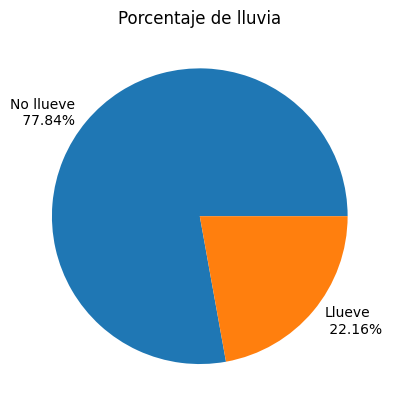

In [63]:
# Gráfico de tortas del porcentaje de muestras llueve y no llueve

clases = np.array([df[df.RainTomorrow == 0.0].shape[0],df[df.RainTomorrow == 1.0].shape[0]])
# Creando las leyendas del grafico.
labels = [ str(round(x * 1.0 / clases.sum() * 100.0, 2)) + '%' for x in clases]
labels[0] = 'No llueve\n ' + labels[0]
labels[1] = 'Llueve\n ' + labels[1]
plt.pie(clases, labels=labels)
plt.title('Porcentaje de lluvia')
plt.show()

**Escalado**

In [66]:
df.columns


Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month', 'Day'],
      dtype='object')

In [111]:
Var_escalado = ['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustDir',
       'WindGustSpeed', 'WindDir9am', 'WindDir3pm', 'WindSpeed9am',
       'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am',
       'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow', 'Year', 'Month', 'Day' ]

# Crear el scaler
scaler = StandardScaler()

# Ajustar el scaler y transformar las variables seleccionadas
df[Var_escalado] = scaler.fit_transform(df[Var_escalado])
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,-1.692032,0.189490,-0.047787,0.144317,-1.443977,0.380871,-1.703862,-1.646091,0.713164,0.649428,...,1.458738,0.129620,-0.010364,0.010709,-0.536378,-0.632783,-0.533589,-1.871361,1.633271,-1.672344
1,-1.692032,-0.748711,0.262380,-0.613404,-1.239640,0.380871,-1.478094,-1.426766,-1.155611,0.413306,...,0.154823,0.129620,0.035844,0.372332,-0.536378,-0.632783,-0.533589,-1.871361,1.633271,-1.558693
2,-1.692032,0.111307,0.346972,-0.613404,-1.035302,0.544106,-1.703862,-1.426766,0.596366,0.885551,...,0.154823,-1.331923,0.621137,0.213218,-0.536378,-0.632783,-0.533589,-1.871361,1.633271,-1.445041
3,-1.692032,-0.467251,0.671238,-0.613404,-0.830965,-1.251483,-1.252327,-1.207440,-0.338022,-1.121493,...,0.154823,0.129620,0.174466,0.690560,-0.536378,1.005113,-0.533589,-1.871361,1.633271,-1.331390
4,-1.692032,0.830595,1.277475,0.649464,-1.443977,0.136018,-1.026559,-0.988114,-0.805215,0.177183,...,1.024100,1.591163,0.128258,1.153437,-0.536378,-0.305204,-0.533589,-1.871361,1.633271,-1.217739


In [112]:
df_clasificacion=corr = df.corr()
top_corr = corr['RainTomorrow'].sort_values(ascending=False)[1:16]
print(top_corr)

RISK_MM          0.956621
Humidity3pm      0.442699
Rainfall         0.333383
RainToday        0.313097
Cloud3pm         0.297758
Humidity9am      0.257877
Cloud9am         0.248911
WindGustSpeed    0.218022
WindSpeed9am     0.087608
MinTemp          0.083915
WindSpeed3pm     0.082506
WindDir9am       0.009860
Month            0.007192
Day              0.005183
Location        -0.008564
Name: RainTomorrow, dtype: float64


In [113]:
df.shape

(140787, 24)

In [114]:
df1 = df.drop(["Year", "Month", "Day"], axis =1)

In [78]:
df11=df1

In [140]:
df.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,Year,Month,Day
0,-1.692032,0.189490,-0.047787,0.144317,-1.443977,0.380871,-1.703862,-1.646091,0.713164,0.649428,...,1.458738,0.129620,-0.010364,0.010709,-0.536378,-0.632783,-0.533589,-1.871361,1.633271,-1.672344
1,-1.692032,-0.748711,0.262380,-0.613404,-1.239640,0.380871,-1.478094,-1.426766,-1.155611,0.413306,...,0.154823,0.129620,0.035844,0.372332,-0.536378,-0.632783,-0.533589,-1.871361,1.633271,-1.558693
2,-1.692032,0.111307,0.346972,-0.613404,-1.035302,0.544106,-1.703862,-1.426766,0.596366,0.885551,...,0.154823,-1.331923,0.621137,0.213218,-0.536378,-0.632783,-0.533589,-1.871361,1.633271,-1.445041
3,-1.692032,-0.467251,0.671238,-0.613404,-0.830965,-1.251483,-1.252327,-1.207440,-0.338022,-1.121493,...,0.154823,0.129620,0.174466,0.690560,-0.536378,1.005113,-0.533589,-1.871361,1.633271,-1.331390
4,-1.692032,0.830595,1.277475,0.649464,-1.443977,0.136018,-1.026559,-0.988114,-0.805215,0.177183,...,1.024100,1.591163,0.128258,1.153437,-0.536378,-0.305204,-0.533589,-1.871361,1.633271,-1.217739


In [80]:
df1.shape

(140787, 21)

In [116]:
df_selec = df1[['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm', 'Pressure9am',
                'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow']]


Se eligen estas caracteristicas ya que en el grafico se asemejan a una distribucion normal.

In [117]:
df_selec.columns



Index(['MinTemp', 'MaxTemp', 'WindGustSpeed', 'WindSpeed3pm', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainTomorrow'],
      dtype='object')

array([[<Axes: title={'center': 'MinTemp'}>,
        <Axes: title={'center': 'MaxTemp'}>,
        <Axes: title={'center': 'WindGustSpeed'}>],
       [<Axes: title={'center': 'WindSpeed3pm'}>,
        <Axes: title={'center': 'Humidity3pm'}>,
        <Axes: title={'center': 'Pressure9am'}>],
       [<Axes: title={'center': 'Pressure3pm'}>,
        <Axes: title={'center': 'Temp9am'}>,
        <Axes: title={'center': 'Temp3pm'}>],
       [<Axes: title={'center': 'RainTomorrow'}>, <Axes: >, <Axes: >]],
      dtype=object)

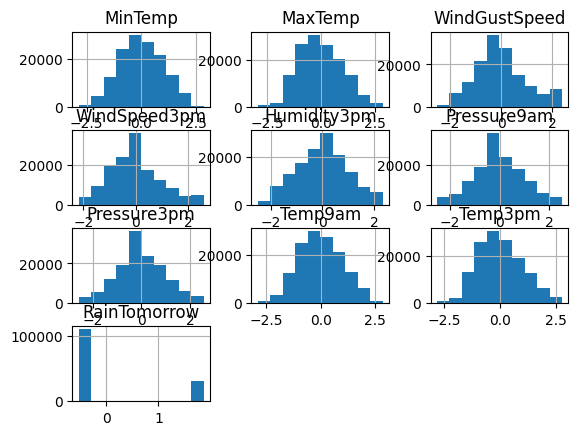

In [118]:
df_selec.hist()

In [ ]:
df_arbol=df_selec

In [ ]:
df_kmeans=df_selec

In [ ]:
df_naive=df_selec

In [ ]:
df_naiveBayes=df_selec

In [84]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 140787 entries, 0 to 142192
Data columns (total 21 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       140787 non-null  float64
 1   MinTemp        140787 non-null  float64
 2   MaxTemp        140787 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   WindGustDir    140787 non-null  int64  
 5   WindGustSpeed  140787 non-null  float64
 6   WindDir9am     140787 non-null  int64  
 7   WindDir3pm     140787 non-null  int64  
 8   WindSpeed9am   140787 non-null  float64
 9   WindSpeed3pm   140787 non-null  float64
 10  Humidity9am    140787 non-null  float64
 11  Humidity3pm    140787 non-null  float64
 12  Pressure9am    140787 non-null  float64
 13  Pressure3pm    140787 non-null  float64
 14  Cloud9am       140787 non-null  float64
 15  Cloud3pm       140787 non-null  float64
 16  Temp9am        140787 non-null  float64
 17  Temp3pm        140787 non-null  fl

##**Usando Selector de columnas**

Se utiliza una clase de Sklearn llamada: SelecKBest , para seleccionar las 5 caracteristicas mejores.

In [119]:

from sklearn.feature_selection import SelectKBest, f_classif

X= df1.drop(['RainTomorrow'], axis=1)
y= df1['RainTomorrow']

# Seleccionar las mejores características usando ANOVA F-test
best = SelectKBest(score_func=f_classif, k=7)  # Seleccionar las 7 mejores características
X_new = best.fit_transform(X, y)

# Obtener los índices de las características seleccionadas
selected_features = X.columns[best.get_support(indices=True)]
print("Caracteristicas Seleccionadas:", selected_features)

Caracteristicas Seleccionadas: Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'RainToday', 'RISK_MM'],
      dtype='object')


In [120]:
# Crear un nuevo DataFrame con las características seleccionadas y la variable objetivo
df_selec = pd.DataFrame(X[selected_features])
df_selec['RainTomorrow'] = y

In [121]:
df_selec.shape


(140787, 8)

In [122]:
df_selec.columns

Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

**Balanceo de Variable Objetivo 'RainTomorrow'**

In [123]:
df_selec['RainTomorrow'].value_counts()

RainTomorrow
-0.533589    109586
 1.874102     31201
Name: count, dtype: int64

In [124]:
df_selec.columns


Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

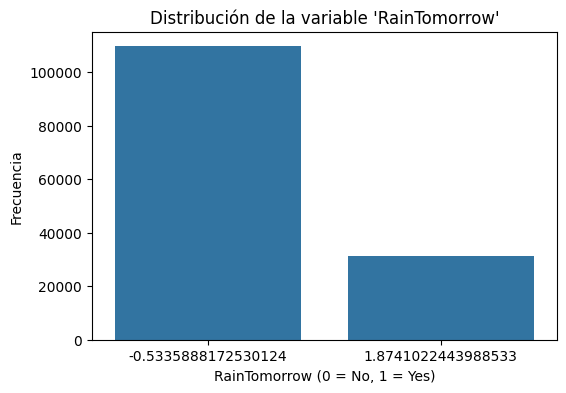

In [125]:
# Visualizar el balance
plt.figure(figsize=(6, 4))
sns.countplot(x='RainTomorrow', data=df_selec)
plt.title("Distribución de la variable 'RainTomorrow'")
plt.xlabel("RainTomorrow (0 = No, 1 = Yes)")
plt.ylabel("Frecuencia")
plt.show()

La variable RainTomorrow está desbalanceada, con 109.586 instancias de la clase 0 (No) y 31.201 instancias de la clase 1 (Sí). Esto afecta el rendimiento de los modelos de aprendizaje automático, especialmente si la clase minoritaria (lluvia) es la que te interesa predecir con mayor precisión.

#MODELADO

In [126]:
from sklearn.feature_selection import SelectKBest, f_classif
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import seaborn as sns
from sklearn.naive_bayes import GaussianNB

In [128]:
df_arbol=df_selec

In [129]:
df_arbol.shape

(140787, 8)


definamos también nuestra variable de etiqueta

In [130]:
label = df_arbol.RainTomorrow

label.head()

0   -0.533589
1   -0.533589
2   -0.533589
3   -0.533589
4   -0.533589
Name: RainTomorrow, dtype: float64

In [131]:
df_arbol.shape

(140787, 8)

Finalmente el data frame es df_selec que contiene 140787 filas y 10 columnas para realizar el modelado.

##**Preparacion de los datos**


In [132]:
# Selecciona las variables
X = df_selec.drop(["RainTomorrow"],axis=1)
# Rescata la etiqueta
y = df_selec.RainTomorrow

In [139]:
LABELS = ['no llueve', 'si llueve']

In [138]:
def mostrar_resultados(y_test, pred_y):
    conf_matrix = confusion_matrix(y_test, pred_y)
    plt.figure(figsize=(2, 2))
    sns.heatmap(conf_matrix, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
    plt.title("Confusion matrix")
    plt.ylabel('Verdadero RainTomorrow')
    plt.xlabel('Predicted RainTomorrow')
    plt.show()
    print (classification_report(y_test, pred_y))

#Arbol de Decision

In [135]:
df_selec.columns

Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

In [137]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Paso 2: Dividir los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar el modelo
#model = DecisionTreeClassifier(random_state=42)
#model.fit(X_train, y_train)

model = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)
model.fit(X_train, y_train)

# Paso 4: Evaluar el modelo
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

# Visualizar la matriz de confusión

from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No', 'Yes'], yticklabels=['No', 'Yes'])
plt.xlabel('Predicción')
plt.ylabel('Real')
plt.title('Matriz de Confusión - Árbol de Decisión Reajustado')
plt.show()

# Paso 5: Visualizar el Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Llueve', 'Llueve'])
plt.show()


ValueError: Unknown label type: 'continuous'

La precisión del modelo para la clase 1 es un poco más alta que la de Naive Bayes 0.69, pero no es muy alta.
El recall para la clase 1 es bajo =0.42, lo que indica que el modelo tiene dificultades para identificar correctamente los casos positivos.
El puntaje F1 para la clase 1 es menor que el de Naive Bayes 0.52, lo que indica un desempeño similar o ligeramente peor.

##**Naives Bayes**

In [102]:
df_selec.columns

Index(['Rainfall', 'Humidity9am', 'Humidity3pm', 'Cloud9am', 'Cloud3pm',
       'RainToday', 'RISK_MM', 'RainTomorrow'],
      dtype='object')

Las variables del df_selec tienen una distribucion normal.

In [103]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state = 29)
# Define el algoritmo a utilizar Naive Bayes
from sklearn.naive_bayes import GaussianNB
modelo = GaussianNB()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Validación del modelo
y_pred = modelo.predict(X_test)

In [104]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

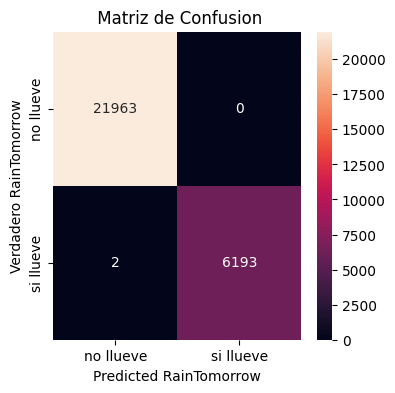

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21963
           1       1.00      1.00      1.00      6195

    accuracy                           1.00     28158
   macro avg       1.00      1.00      1.00     28158
weighted avg       1.00      1.00      1.00     28158

Precisión del modelo: 1.0


In [105]:
# Evaluación del modelo
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(4, 4))
sns.heatmap(matriz, xticklabels=LABELS, yticklabels=LABELS, annot=True, fmt="d");
plt.title(" Matriz de Confusion")
plt.ylabel('Verdadero RainTomorrow')
plt.xlabel('Predicted RainTomorrow')
plt.show()
print (classification_report(y_test, y_pred))

#print('Matriz de Confusión:')
#print(matriz)
# Se calcula la precisión del modelo
from sklearn.metrics import precision_score
precision = precision_score(y_test, y_pred)
print('Precisión del modelo:', precision)

Otras medidas.

In [106]:
from sklearn.metrics import accuracy_score, f1_score, recall_score
accuracy = accuracy_score(y_test, y_pred)
print('Accurancy del modelo:',accuracy)
print('F1 score del modelo:',f1_score(y_test, y_pred))
print('Recall del modelo:',recall_score(y_test, y_pred))

Accurancy del modelo: 0.9999289722281413
F1 score del modelo: 0.9998385534388118
Recall del modelo: 0.9996771589991928


Naive Bayes:

La precisión del modelo para la clase 1 (si llueve) es relativamente baja 0.61, lo que indica que el modelo tiene dificultades para predecir correctamente los casos positivos.
El recall para la clase 1 también es bajo 0.51, lo que significa que el modelo no identifica correctamente muchos de los casos positivos.
El puntaje F1 para la clase 1 es bajo 0.56, lo que sugiere un desempeño general insatisfactorio en la clasificación de casos positivos.

##SVM (Support Vector Machine)

In [107]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Paso 1: Preparar los datos
X = df_selec.drop('RainTomorrow', axis=1)
y = df_selec['RainTomorrow']

# Paso 2: Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Paso 3: Entrenar el modelo SVM
model_svm = SVC(kernel='linear', random_state=42)
model_svm.fit(X_train, y_train)

# Paso 4: Realizar predicciones en el conjunto de prueba
y_pred_svm = model_svm.predict(X_test)

# Paso 5: Evaluar el modelo
print("Classification Report (SVM):")
print(classification_report(y_test, y_pred_svm))
print("Confusion Matrix (SVM):")
print(confusion_matrix(y_test, y_pred_svm))


Classification Report (SVM):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21897
           1       1.00      1.00      1.00      6261

    accuracy                           1.00     28158
   macro avg       1.00      1.00      1.00     28158
weighted avg       1.00      1.00      1.00     28158

Confusion Matrix (SVM):
[[21897     0]
 [    0  6261]]


La precisión del modelo para la clase 1 es la más alta entre los tres modelos 0.75, lo que indica que tiene menos falsos positivos en comparación con los otros modelos.
El recall para la clase 1 es bajo 0.42, similar al del Árbol de Decisión, lo que indica que el modelo tiene dificultades para identificar correctamente los casos positivos.
El puntaje F1 para la clase 1 es más alto que el de los otros dos modelos 0.54, lo que indica un desempeño generalmente mejor.

**CONCLUSION**
Ninguno de los modelos tiene un desempeño muy satisfactorio en la predicción de lluvia. Se debe  ajustar los hiperparámetros de los modelos.También es importante considerar el desequilibrio de clases ya que esto puede afectar el rendimiento del modelo.

#**MEJORAR LOS MODELOS**

##Balancear la clase Objetivo usando Smoth

In [108]:
df_selec.head(3)

,Rainfall,Humidity9am,Humidity3pm,Cloud9am,Cloud3pm,RainToday,RISK_MM,RainTomorrow
0,0.3,0.646341,0.22,0.888889,0.500,0,0.0,0
1,0.0,0.317073,0.25,0.555556,0.500,0,0.0,0
2,0.0,0.243902,0.30,0.555556,0.125,0,0.0,0


In [109]:
# Importar las bibliotecas necesarias
from imblearn.over_sampling import SMOTE

# Crear una instancia de SMOTE
smote = SMOTE(random_state=42)

# Aplicar SMOTE para balancear los datos
X_smote, y_smote = smote.fit_resample(X, y)


**ARBOL DE DECISION**

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Crear el clasificador del árbol de decisión
decision_tree = DecisionTreeClassifier(random_state=42)

# Entrenar el clasificador
decision_tree.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = decision_tree.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[21753     0]
 [    0 22082]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     21753
           1       1.00      1.00      1.00     22082

    accuracy                           1.00     43835
   macro avg       1.00      1.00      1.00     43835
weighted avg       1.00      1.00      1.00     43835



La precisión del modelo para predecir la clase 0 (no llueve) es del 84%, lo que significa que el 84% de las predicciones de no lluvia son correctas. Para la clase 1 (llueve), la precisión es del 83%, lo que significa que el 83% de las predicciones de lluvia son correctas.

El recall, o sensibilidad, para la clase 0 es del 83%, lo que indica que el 83% de los casos reales de no lluvia fueron correctamente identificados por el modelo. Para la clase 1, el recall es del 85%, lo que significa que el 85% de los casos reales de lluvia fueron correctamente identificados por el modelo.

El puntaje F1 es una medida de la precisión del modelo que tiene en cuenta tanto la precisión como el recall. Para la clase 0, el puntaje F1 es del 83%, y para la clase 1 es del 84%

El **modelo de árbol de decisión** es capaz de predecir con bastante precisión si lloverá o no en función de las características proporcionadas. Se puede  mejorar, especialmente en la identificación de los casos en los que realmente llueve (clase 1), donde el modelo podría beneficiarse de un mayor recall para garantizar que no se pasen por alto estos casos importantes.

In [ ]:
# Paso 5: Visualizar el Árbol de Decisión
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=['No Llueve', 'Llueve'])
plt.show()

**NAIVES BAYES**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Crear el clasificador Naive Bayes
naive_bayes = GaussianNB()

# Entrenar el clasificador
naive_bayes.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = naive_bayes.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[16953  4800]
 [ 6132 15950]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.73      0.78      0.76     21753
           1       0.77      0.72      0.74     22082

    accuracy                           0.75     43835
   macro avg       0.75      0.75      0.75     43835
weighted avg       0.75      0.75      0.75     43835



El modelo de Naive Bayes ha obtenido una precisión del 75%, lo que significa que es capaz de predecir correctamente si lloverá o no aproximadamente el 75%, esto indica un rendimiento moderado.
<br>
Observando la matriz de confusión, podemos notar que el modelo predijo correctamente 16953 casos de "no llueve" (clase 0), lo que representa un 78% de precisión para esta clase. Sin embargo, el modelo identificó correctamente solo 15950 casos de "llueve" (clase 1), con una precisión del 77% para esta clase.Esto indica que el modelo tiene un mejor rendimiento en la predicción de casos de "no llueve" en comparación con casos de "llueve".<br>
El recall del modelo para la clase "no llueve" es del 73%, lo que significa que identificó correctamente el 73% de todos los casos reales en los que no llovía. Para la clase "llueve", el recall es del 72%, lo que indica que identificó correctamente el 72% de todos los casos reales en los que llovía.
<br>
El modelo de Naive Bayes ha logrado una precisión aceptable, puede haber margen para mejorar su capacidad para identificar casos de llueve.

**SUPPORT VECTOR MACHINE**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.2, random_state=42)

# Crear el clasificador SVM
svm_classifier = SVC(random_state=42)

# Entrenar el clasificador
svm_classifier.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred = svm_classifier.predict(X_test)

# Evaluar el rendimiento del modelo
print("Matriz de Confusión:")
print(confusion_matrix(y_test, y_pred))
print("\nReporte de Clasificación:")
print(classification_report(y_test, y_pred))


Matriz de Confusión:
[[17374  4379]
 [ 4882 17200]]

Reporte de Clasificación:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79     21753
           1       0.80      0.78      0.79     22082

    accuracy                           0.79     43835
   macro avg       0.79      0.79      0.79     43835
weighted avg       0.79      0.79      0.79     43835



**CONCLUSION**
aplicar SMOTE ha mejorado el rendimiento de los modelos. La mejora en la precisión y el recall es un indicador positivo de que el balanceo de clases ha ayudado al modelo a generalizar mejor.<BR>
SMOTE ha mejorado el rendimiento de los modelos indicando que el desbalance en las clases de la variable objetivo estaba afectando negativamente su capacidad para hacer predicciones precisas. Al equilibrar las clases mediante SMOTE, el modelo ahora puede aprender de manera más equitativa de ambas clases y, como resultado, lograr un rendimiento más equilibrado en términos de precisión y recall para ambas clases.